In [1]:
# Parameters
file_path = "TSLA.csv"


<a href="https://colab.research.google.com/github/AshtonGlover/stock-prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [3]:
import pandas as pd
import tensorflow

truncated_name = file_path.split(".")[0]
file_path = "datasets/" + file_path if 'file_path' in globals() else 'datasets/MSFT.csv'

df = pd.read_csv(file_path)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-23,229.339996,238.979996,229.289993,236.860001,236.860001,101077600
1,2023-08-24,238.660004,238.919998,228.179993,230.039993,230.039993,99777400
2,2023-08-25,231.309998,239.000000,230.350006,238.589996,238.589996,106612200
3,2023-08-28,242.580002,244.380005,235.350006,238.820007,238.820007,107673700
4,2023-08-29,238.580002,257.480011,237.770004,257.179993,257.179993,134047600
...,...,...,...,...,...,...,...
247,2024-08-16,211.149994,219.800003,210.800003,216.119995,216.119995,88765100
248,2024-08-19,217.070007,222.979996,214.089996,222.720001,222.720001,76435200
249,2024-08-20,224.880005,228.220001,219.559998,221.100006,221.100006,74001200
250,2024-08-21,222.669998,224.660004,218.860001,223.270004,223.270004,70146000


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2023-08-23,236.860001
1,2023-08-24,230.039993
2,2023-08-25,238.589996
3,2023-08-28,238.820007
4,2023-08-29,257.179993
...,...,...
247,2024-08-16,216.119995
248,2024-08-19,222.720001
249,2024-08-20,221.100006
250,2024-08-21,223.270004


In [5]:
import datetime

def strToDate(s):
  split_date = s.split('-')
  day, month, year = int(split_date[2]), int(split_date[1]), int(split_date[0])
  return datetime.datetime(year = year, month = month, day = day)

In [6]:
df['Date'] = df['Date'].apply(strToDate)
df['Date']

/var/folders/t5/bfwy3czx4ks1lybmc4f9rd5m0000gn/T/ipykernel_87285/3418807745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(strToDate)


0     2023-08-23
1     2023-08-24
2     2023-08-25
3     2023-08-28
4     2023-08-29
         ...    
247   2024-08-16
248   2024-08-19
249   2024-08-20
250   2024-08-21
251   2024-08-22
Name: Date, Length: 252, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2023-08-23,236.860001
2023-08-24,230.039993
2023-08-25,238.589996
2023-08-28,238.820007
2023-08-29,257.179993
...,...
2024-08-16,216.119995
2024-08-19,222.720001
2024-08-20,221.100006


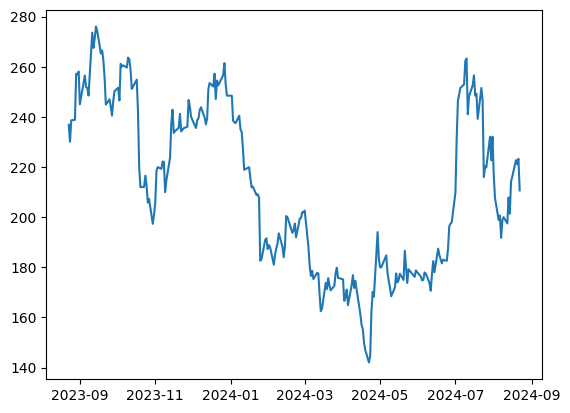

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = strToDate(first_date_str)
  last_date  = strToDate(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(len(df_subset))
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2023-10-05',
                                '2024-08-22',
                                n=30)
windowed_df

,Target Date,Target-30,Target-29,Target-28,Target-27,Target-26,Target-25,Target-24,Target-23,Target-22,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2023-10-05,236.860001,230.039993,238.589996,238.820007,257.179993,256.899994,258.079987,245.009995,256.489990,...,244.880005,246.990005,244.119995,240.500000,246.380005,250.220001,251.600006,246.529999,261.160004,260.049988
1,2023-10-06,230.039993,238.589996,238.820007,257.179993,256.899994,258.079987,245.009995,256.489990,251.919998,...,246.990005,244.119995,240.500000,246.380005,250.220001,251.600006,246.529999,261.160004,260.049988,260.529999
2,2023-10-09,238.589996,238.820007,257.179993,256.899994,258.079987,245.009995,256.489990,251.919998,251.490005,...,244.119995,240.500000,246.380005,250.220001,251.600006,246.529999,261.160004,260.049988,260.529999,259.670013
3,2023-10-10,238.820007,257.179993,256.899994,258.079987,245.009995,256.489990,251.919998,251.490005,248.500000,...,240.500000,246.380005,250.220001,251.600006,246.529999,261.160004,260.049988,260.529999,259.670013,263.619995
4,2023-10-11,257.179993,256.899994,258.079987,245.009995,256.489990,251.919998,251.490005,248.500000,273.579987,...,246.380005,250.220001,251.600006,246.529999,261.160004,260.049988,260.529999,259.670013,263.619995,262.989990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2024-08-16,251.520004,252.940002,262.329987,263.260010,241.029999,248.229996,252.639999,256.559998,248.500000,...,198.880005,200.639999,191.759995,198.839996,200.000000,197.490005,207.830002,201.380005,214.139999,216.119995
218,2024-08-19,252.940002,262.329987,263.260010,241.029999,248.229996,252.639999,256.559998,248.500000,249.229996,...,200.639999,191.759995,198.839996,200.000000,197.490005,207.830002,201.380005,214.139999,216.119995,222.720001
219,2024-08-20,262.329987,263.260010,241.029999,248.229996,252.639999,256.559998,248.500000,249.229996,239.199997,...,191.759995,198.839996,200.000000,197.490005,207.830002,201.380005,214.139999,216.119995,222.720001,221.100006
220,2024-08-21,263.260010,241.029999,248.229996,252.639999,256.559998,248.500000,249.229996,239.199997,251.509995,...,198.839996,200.000000,197.490005,207.830002,201.380005,214.139999,216.119995,222.720001,221.100006,223.270004


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  dfasnp = windowed_dataframe.to_numpy()

  dates = dfasnp[:, 0]

  middle_matrix = dfasnp[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = dfasnp[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((222,), (222, 30, 1), (222,))

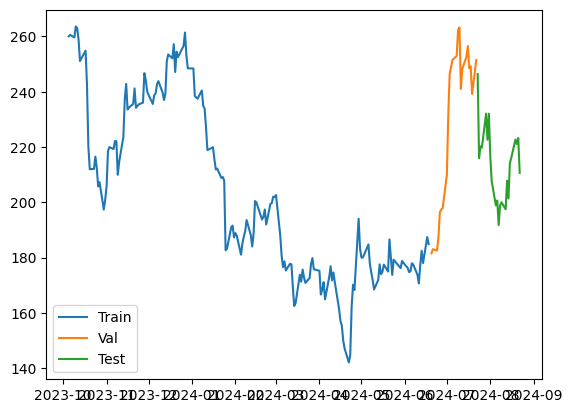

In [11]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, x_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, x_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, x_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential([
                    layers.Input(shape=(30, 1)),

                    layers.LSTM(units=256),

                    layers.Dense(units=256, activation='relu'),
                    layers.Dense(units=128, activation='relu'),
                    layers.Dense(units=64, activation='relu'),
                    layers.Dense(units=32, activation='relu'),
                    layers.Dense(units=1)
                ])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 100)



Epoch 1/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 40332.5625 - mean_absolute_error: 198.7039

2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 40727.1719 - mean_absolute_error: 199.6208

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 40712.7266 - mean_absolute_error: 199.5527

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 41234.9219 - mean_absolute_error: 200.7348

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 41307.6680 - mean_absolute_error: 200.8992 - val_loss: 52496.4609 - val_mean_absolute_error: 227.2726


Epoch 2/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 39606.7344 - mean_absolute_error: 196.5969

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 40297.8906 - mean_absolute_error: 198.4213

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 40571.5703 - mean_absolute_error: 199.0579 - val_loss: 51148.3516 - val_mean_absolute_error: 224.2839


Epoch 3/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 44409.7031 - mean_absolute_error: 208.3312

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 41661.6367 - mean_absolute_error: 201.5709

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 40984.7031 - mean_absolute_error: 199.8792 - val_loss: 47822.4219 - val_mean_absolute_error: 216.7324


Epoch 4/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 41897.5039 - mean_absolute_error: 202.3565

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 37280.2461 - mean_absolute_error: 190.3997

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 36651.8438 - mean_absolute_error: 188.7191 - val_loss: 40058.2500 - val_mean_absolute_error: 197.9397


Epoch 5/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 33176.7734 - mean_absolute_error: 178.9988

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 31425.9746 - mean_absolute_error: 173.8827

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 30598.0957 - mean_absolute_error: 171.4100

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 29141.5449 - mean_absolute_error: 166.9301

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 28674.4629 - mean_absolute_error: 165.4814 - val_loss: 23851.1738 - val_mean_absolute_error: 151.2599


Epoch 6/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 16101.6855 - mean_absolute_error: 122.1868

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 14422.9590 - mean_absolute_error: 113.7588

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12590.7197 - mean_absolute_error: 103.6675 - val_loss: 2545.3799 - val_mean_absolute_error: 42.9370


Epoch 7/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1588.3010 - mean_absolute_error: 33.6281

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2162.8784 - mean_absolute_error: 39.3890

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2496.9521 - mean_absolute_error: 42.1195 - val_loss: 1663.0262 - val_mean_absolute_error: 28.5984


Epoch 8/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3469.3911 - mean_absolute_error: 49.0778

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3150.8359 - mean_absolute_error: 47.6477

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2927.0178 - mean_absolute_error: 45.7345 - val_loss: 1893.7593 - val_mean_absolute_error: 37.0992


Epoch 9/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 958.1000 - mean_absolute_error: 28.1295

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1101.3683 - mean_absolute_error: 28.1063

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1242.3608 - mean_absolute_error: 28.4793

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1274.7279 - mean_absolute_error: 28.6216 - val_loss: 3866.4670 - val_mean_absolute_error: 54.8495


Epoch 10/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2172.8667 - mean_absolute_error: 35.8818

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1851.4341 - mean_absolute_error: 31.7533

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1761.8021 - mean_absolute_error: 31.0018 - val_loss: 2049.3811 - val_mean_absolute_error: 38.4815


Epoch 11/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1050.3979 - mean_absolute_error: 25.8374

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1048.2053 - mean_absolute_error: 27.4487

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1044.6447 - mean_absolute_error: 27.6133 - val_loss: 1020.6853 - val_mean_absolute_error: 30.3182


Epoch 12/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1324.7344 - mean_absolute_error: 32.6110

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1264.4680 - mean_absolute_error: 31.8201

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1231.8788 - mean_absolute_error: 31.4056 - val_loss: 1238.5216 - val_mean_absolute_error: 32.1457


Epoch 13/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1146.2272 - mean_absolute_error: 30.7166

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1070.9868 - mean_absolute_error: 29.3716

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1047.7709 - mean_absolute_error: 28.7969 - val_loss: 1870.7675 - val_mean_absolute_error: 36.7816


Epoch 14/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 940.1964 - mean_absolute_error: 27.0469

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1033.3035 - mean_absolute_error: 27.7089

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1017.0244 - mean_absolute_error: 27.3306 - val_loss: 1695.7660 - val_mean_absolute_error: 35.2453


Epoch 15/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 617.0908 - mean_absolute_error: 20.4782

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 741.7177 - mean_absolute_error: 23.0149

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 768.6496 - mean_absolute_error: 23.5892

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 786.5574 - mean_absolute_error: 23.9865

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 815.2499 - mean_absolute_error: 24.6033 - val_loss: 1273.8905 - val_mean_absolute_error: 31.8628


Epoch 16/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 839.0986 - mean_absolute_error: 26.0159

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 846.2726 - mean_absolute_error: 25.7619

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 839.4866 - mean_absolute_error: 25.6419 - val_loss: 1295.2911 - val_mean_absolute_error: 31.4169


Epoch 17/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 897.5590 - mean_absolute_error: 26.3194

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 805.7752 - mean_absolute_error: 24.4599

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 794.1185 - mean_absolute_error: 24.3138 - val_loss: 1515.8214 - val_mean_absolute_error: 33.2021


Epoch 18/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 720.3190 - mean_absolute_error: 23.1207

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 734.1635 - mean_absolute_error: 23.1166

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 741.8474 - mean_absolute_error: 23.2227 - val_loss: 1319.9720 - val_mean_absolute_error: 31.4488


Epoch 19/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 627.4745 - mean_absolute_error: 21.4399

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 654.4977 - mean_absolute_error: 22.1208

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 653.6581 - mean_absolute_error: 22.0201 - val_loss: 1328.8354 - val_mean_absolute_error: 31.0168


Epoch 20/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 568.8660 - mean_absolute_error: 19.8081

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 522.2318 - mean_absolute_error: 19.3314

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 529.3655 - mean_absolute_error: 19.5005 - val_loss: 1056.6899 - val_mean_absolute_error: 27.7078


Epoch 21/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 387.6553 - mean_absolute_error: 16.8913

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 445.5489 - mean_absolute_error: 18.3846

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 451.4273 - mean_absolute_error: 18.5201 - val_loss: 1186.0284 - val_mean_absolute_error: 29.1715


Epoch 22/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 507.5306 - mean_absolute_error: 19.6062

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 389.1440 - mean_absolute_error: 16.5353

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 368.0186 - mean_absolute_error: 15.9759 - val_loss: 1029.4358 - val_mean_absolute_error: 27.4136


Epoch 23/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 222.8176 - mean_absolute_error: 10.8591

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 214.5213 - mean_absolute_error: 11.2435

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 207.5477 - mean_absolute_error: 11.1365 - val_loss: 737.5948 - val_mean_absolute_error: 22.5203


Epoch 24/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 110.0274 - mean_absolute_error: 8.6295

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 118.3574 - mean_absolute_error: 8.6048

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 121.1686 - mean_absolute_error: 8.6665 - val_loss: 760.9596 - val_mean_absolute_error: 24.4241


Epoch 25/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 85.4732 - mean_absolute_error: 7.7303

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 101.0669 - mean_absolute_error: 7.9486

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 105.5717 - mean_absolute_error: 8.0536 - val_loss: 155.8795 - val_mean_absolute_error: 10.6494


Epoch 26/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 166.0759 - mean_absolute_error: 10.8115

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 157.9987 - mean_absolute_error: 10.2318

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 151.9241 - mean_absolute_error: 9.9928 - val_loss: 677.0029 - val_mean_absolute_error: 23.6576


Epoch 27/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 115.2424 - mean_absolute_error: 8.7618

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 112.8303 - mean_absolute_error: 8.4614

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 109.8335 - mean_absolute_error: 8.3227 - val_loss: 475.6904 - val_mean_absolute_error: 18.8799


Epoch 28/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 71.6679 - mean_absolute_error: 6.7495

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 70.7126 - mean_absolute_error: 6.6646

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 70.5841 - mean_absolute_error: 6.6110 - val_loss: 315.5841 - val_mean_absolute_error: 14.6053


Epoch 29/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 73.1922 - mean_absolute_error: 6.7019

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 58.9634 - mean_absolute_error: 5.9871

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 58.4244 - mean_absolute_error: 5.9287 - val_loss: 257.9082 - val_mean_absolute_error: 13.1493


Epoch 30/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 47.9591 - mean_absolute_error: 4.8363

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 63.6936 - mean_absolute_error: 5.9407

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 64.1867 - mean_absolute_error: 6.0846 - val_loss: 340.1453 - val_mean_absolute_error: 16.2985


Epoch 31/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 50.0781 - mean_absolute_error: 5.7977

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 57.5145 - mean_absolute_error: 5.9704

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 61.1256 - mean_absolute_error: 6.1038 - val_loss: 184.4037 - val_mean_absolute_error: 11.8433


Epoch 32/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 36.6513 - mean_absolute_error: 4.9263

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 47.7616 - mean_absolute_error: 5.5024

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 49.9674 - mean_absolute_error: 5.6026 - val_loss: 83.0839 - val_mean_absolute_error: 7.3146


Epoch 33/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 101.9150 - mean_absolute_error: 7.9757

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.1351 - mean_absolute_error: 6.4751 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 66.3291 - mean_absolute_error: 6.2538 - val_loss: 293.3651 - val_mean_absolute_error: 14.5644


Epoch 34/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 42.3721 - mean_absolute_error: 5.2786

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 51.2738 - mean_absolute_error: 5.5157

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 52.4430 - mean_absolute_error: 5.5279 - val_loss: 227.7406 - val_mean_absolute_error: 12.7624


Epoch 35/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 39.0620 - mean_absolute_error: 5.1653

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 49.4742 - mean_absolute_error: 5.4043

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 47.9642 - mean_absolute_error: 5.2867 - val_loss: 150.6253 - val_mean_absolute_error: 10.2134


Epoch 36/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 46.2569 - mean_absolute_error: 5.5886

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 44.6325 - mean_absolute_error: 5.0795

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 43.6871 - mean_absolute_error: 4.9819 - val_loss: 167.4395 - val_mean_absolute_error: 11.1498


Epoch 37/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 50.8616 - mean_absolute_error: 5.4859

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 42.4847 - mean_absolute_error: 5.0139

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 42.7066 - mean_absolute_error: 4.9775 - val_loss: 117.1197 - val_mean_absolute_error: 9.0782


Epoch 38/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 35.3970 - mean_absolute_error: 4.4404

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 40.7377 - mean_absolute_error: 4.6943

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 40.5814 - mean_absolute_error: 4.6905 - val_loss: 124.0191 - val_mean_absolute_error: 9.1425


Epoch 39/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 29.9239 - mean_absolute_error: 3.8385

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 37.9472 - mean_absolute_error: 4.4569

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 38.3426 - mean_absolute_error: 4.5124 - val_loss: 134.2428 - val_mean_absolute_error: 9.6976


Epoch 40/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 34.0294 - mean_absolute_error: 4.5420

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 33.0001 - mean_absolute_error: 4.5026

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 34.8410 - mean_absolute_error: 4.5319 - val_loss: 156.8650 - val_mean_absolute_error: 10.6140


Epoch 41/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 55.9682 - mean_absolute_error: 5.6747

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 45.7550 - mean_absolute_error: 5.1324

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 44.4546 - mean_absolute_error: 5.0450 - val_loss: 104.9507 - val_mean_absolute_error: 7.9782


Epoch 42/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 20.6163 - mean_absolute_error: 3.5334

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 39.8141 - mean_absolute_error: 4.5991

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 40.0816 - mean_absolute_error: 4.6500 - val_loss: 144.9067 - val_mean_absolute_error: 10.1005


Epoch 43/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 26.9386 - mean_absolute_error: 4.3151

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 38.9392 - mean_absolute_error: 4.6697

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 39.2350 - mean_absolute_error: 4.6883 - val_loss: 128.0341 - val_mean_absolute_error: 9.6314


Epoch 44/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 52.0694 - mean_absolute_error: 5.1049

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 47.3390 - mean_absolute_error: 5.0551

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 45.0184 - mean_absolute_error: 4.9363 - val_loss: 118.8782 - val_mean_absolute_error: 8.8829


Epoch 45/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 25.7255 - mean_absolute_error: 4.0197

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 33.5587 - mean_absolute_error: 4.3472

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 36.0795 - mean_absolute_error: 4.5011 - val_loss: 152.3069 - val_mean_absolute_error: 10.6647


Epoch 46/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 37.1924 - mean_absolute_error: 4.9842

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 46.2065 - mean_absolute_error: 5.2367

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 46.3014 - mean_absolute_error: 5.2108 - val_loss: 158.3862 - val_mean_absolute_error: 10.7087


Epoch 47/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 46.1594 - mean_absolute_error: 4.4499

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 42.7103 - mean_absolute_error: 4.7735

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 42.9022 - mean_absolute_error: 4.7948 - val_loss: 128.5132 - val_mean_absolute_error: 9.4347


Epoch 48/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 28.9117 - mean_absolute_error: 4.2008

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 38.4761 - mean_absolute_error: 4.6784

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 39.6315 - mean_absolute_error: 4.7214 - val_loss: 104.3027 - val_mean_absolute_error: 8.1356


Epoch 49/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 27.4788 - mean_absolute_error: 4.1128

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 32.3751 - mean_absolute_error: 4.3156

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 34.7466 - mean_absolute_error: 4.4652 - val_loss: 74.1386 - val_mean_absolute_error: 6.5763


Epoch 50/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 44.7564 - mean_absolute_error: 4.8554

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 45.9177 - mean_absolute_error: 5.0544

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 45.2763 - mean_absolute_error: 5.0322 - val_loss: 183.3166 - val_mean_absolute_error: 11.7849


Epoch 51/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 44.5548 - mean_absolute_error: 5.5769

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 40.1153 - mean_absolute_error: 5.0084

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 40.8142 - mean_absolute_error: 4.9935 - val_loss: 127.5445 - val_mean_absolute_error: 9.4841


Epoch 52/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 27.0880 - mean_absolute_error: 4.3008

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 33.7011 - mean_absolute_error: 4.5251

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 35.1998 - mean_absolute_error: 4.5675 - val_loss: 122.0258 - val_mean_absolute_error: 9.2130


Epoch 53/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 57.3656 - mean_absolute_error: 5.1141

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 41.9382 - mean_absolute_error: 4.5425

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 41.0202 - mean_absolute_error: 4.5605 - val_loss: 157.8705 - val_mean_absolute_error: 10.6473


Epoch 54/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 46.7287 - mean_absolute_error: 5.0854

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 41.9387 - mean_absolute_error: 4.8989

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 41.7623 - mean_absolute_error: 4.8853 - val_loss: 101.8839 - val_mean_absolute_error: 8.2346


Epoch 55/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 34.0246 - mean_absolute_error: 3.9686

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 41.4398 - mean_absolute_error: 4.7407

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 41.4549 - mean_absolute_error: 4.7646 - val_loss: 95.0531 - val_mean_absolute_error: 7.6780


Epoch 56/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 34.8295 - mean_absolute_error: 4.6491

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 37.1542 - mean_absolute_error: 4.7162

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 37.9760 - mean_absolute_error: 4.7333 - val_loss: 93.4571 - val_mean_absolute_error: 7.5106


Epoch 57/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 24.9597 - mean_absolute_error: 3.8680

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 35.3770 - mean_absolute_error: 4.4111

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 37.1769 - mean_absolute_error: 4.5322 - val_loss: 105.3121 - val_mean_absolute_error: 8.1921


Epoch 58/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 25.9229 - mean_absolute_error: 3.8847

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 36.1596 - mean_absolute_error: 4.5026

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 37.3396 - mean_absolute_error: 4.5394 - val_loss: 141.9727 - val_mean_absolute_error: 10.1521


Epoch 59/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 33.4429 - mean_absolute_error: 4.5647

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 36.6399 - mean_absolute_error: 4.5574

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 37.1654 - mean_absolute_error: 4.5593 - val_loss: 109.7975 - val_mean_absolute_error: 8.5370


Epoch 60/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 35.9071 - mean_absolute_error: 3.9128

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 37.8628 - mean_absolute_error: 4.3441

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 37.8833 - mean_absolute_error: 4.4203 - val_loss: 97.0062 - val_mean_absolute_error: 7.8701


Epoch 61/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 29.6430 - mean_absolute_error: 4.3469

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 34.3666 - mean_absolute_error: 4.5021

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 36.5138 - mean_absolute_error: 4.5958 - val_loss: 136.8832 - val_mean_absolute_error: 9.9076


Epoch 62/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 29.1326 - mean_absolute_error: 4.3234

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 40.6979 - mean_absolute_error: 4.7680

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 41.1304 - mean_absolute_error: 4.7906 - val_loss: 181.4760 - val_mean_absolute_error: 11.6598


Epoch 63/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 39.0966 - mean_absolute_error: 5.1786

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 44.2203 - mean_absolute_error: 5.0959

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 43.5248 - mean_absolute_error: 5.0079 - val_loss: 90.5410 - val_mean_absolute_error: 7.4867


Epoch 64/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 51.4541 - mean_absolute_error: 4.6439

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 48.3981 - mean_absolute_error: 4.7584

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 47.0447 - mean_absolute_error: 4.7678 - val_loss: 75.2828 - val_mean_absolute_error: 6.4251


Epoch 65/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 54.2842 - mean_absolute_error: 5.5697

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 46.2004 - mean_absolute_error: 5.0728

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 43.9760 - mean_absolute_error: 4.9358

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 43.4205 - mean_absolute_error: 4.8958 - val_loss: 121.6520 - val_mean_absolute_error: 9.1636


Epoch 66/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 38.8408 - mean_absolute_error: 4.3182

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 34.6813 - mean_absolute_error: 4.2563

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 35.3152 - mean_absolute_error: 4.3190 - val_loss: 124.6247 - val_mean_absolute_error: 9.3005


Epoch 67/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 25.3201 - mean_absolute_error: 3.9820

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 32.1568 - mean_absolute_error: 4.3218

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 34.8724 - mean_absolute_error: 4.4220 - val_loss: 125.8110 - val_mean_absolute_error: 9.2669


Epoch 68/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 16.1375 - mean_absolute_error: 2.9816

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 33.5763 - mean_absolute_error: 4.1458

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 34.7220 - mean_absolute_error: 4.2730 - val_loss: 106.4839 - val_mean_absolute_error: 8.3470


Epoch 69/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 23.3853 - mean_absolute_error: 3.6315

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 29.4677 - mean_absolute_error: 4.1026

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 32.4805 - mean_absolute_error: 4.2541 - val_loss: 147.8317 - val_mean_absolute_error: 10.4485


Epoch 70/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 67.4787 - mean_absolute_error: 6.4349

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 46.8763 - mean_absolute_error: 5.2800

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 44.9199 - mean_absolute_error: 5.1555 - val_loss: 100.7050 - val_mean_absolute_error: 7.9365


Epoch 71/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 47.5310 - mean_absolute_error: 5.0367

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 39.8454 - mean_absolute_error: 4.6785

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 39.1474 - mean_absolute_error: 4.6463 - val_loss: 99.9973 - val_mean_absolute_error: 7.7929


Epoch 72/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 37.8789 - mean_absolute_error: 4.7224

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 40.2333 - mean_absolute_error: 4.8174

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 39.4423 - mean_absolute_error: 4.7418 - val_loss: 118.8541 - val_mean_absolute_error: 8.9194


Epoch 73/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 43.6848 - mean_absolute_error: 4.6768

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 36.5227 - mean_absolute_error: 4.4273

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 36.9099 - mean_absolute_error: 4.4638 - val_loss: 124.7358 - val_mean_absolute_error: 9.4735


Epoch 74/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 24.6259 - mean_absolute_error: 4.2048

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 36.5200 - mean_absolute_error: 4.6374

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 41.4988 - mean_absolute_error: 4.9381 - val_loss: 130.1861 - val_mean_absolute_error: 9.8718


Epoch 75/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 89.8024 - mean_absolute_error: 7.3731

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 64.6485 - mean_absolute_error: 6.1305

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 59.8055 - mean_absolute_error: 5.8550 - val_loss: 90.4056 - val_mean_absolute_error: 7.8165


Epoch 76/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 32.4578 - mean_absolute_error: 4.3077

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 34.1414 - mean_absolute_error: 4.5278

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 36.8218 - mean_absolute_error: 4.6771 - val_loss: 66.0951 - val_mean_absolute_error: 6.1383


Epoch 77/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 47.4005 - mean_absolute_error: 4.9922

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 37.2821 - mean_absolute_error: 4.4495

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 39.6219 - mean_absolute_error: 4.6300 - val_loss: 103.7814 - val_mean_absolute_error: 8.2315


Epoch 78/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 62.3997 - mean_absolute_error: 5.8681

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 46.2474 - mean_absolute_error: 5.0360

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 44.0048 - mean_absolute_error: 4.9053 - val_loss: 119.4571 - val_mean_absolute_error: 9.2604


Epoch 79/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 24.3447 - mean_absolute_error: 4.0366

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 35.3580 - mean_absolute_error: 4.4693

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 36.0569 - mean_absolute_error: 4.4898 - val_loss: 121.9719 - val_mean_absolute_error: 9.3062


Epoch 80/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 34.2822 - mean_absolute_error: 4.0116

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 39.0209 - mean_absolute_error: 4.5024

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 39.0395 - mean_absolute_error: 4.5550 - val_loss: 152.2263 - val_mean_absolute_error: 10.5168


Epoch 81/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 73.0853 - mean_absolute_error: 5.9643

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 53.7042 - mean_absolute_error: 5.2439

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 47.9210 - mean_absolute_error: 5.0512 - val_loss: 110.0747 - val_mean_absolute_error: 8.7879


Epoch 82/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 49.4397 - mean_absolute_error: 5.5289

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 42.4126 - mean_absolute_error: 4.9280

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 41.1714 - mean_absolute_error: 4.8399 - val_loss: 91.7768 - val_mean_absolute_error: 7.8613


Epoch 83/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 36.6808 - mean_absolute_error: 4.9985

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 35.6124 - mean_absolute_error: 4.7566

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 37.6119 - mean_absolute_error: 4.8250 - val_loss: 80.8921 - val_mean_absolute_error: 7.2573


Epoch 84/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 38.1830 - mean_absolute_error: 4.7301

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 48.2429 - mean_absolute_error: 5.2111 

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 49.2149 - mean_absolute_error: 5.2445

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 49.5990 - mean_absolute_error: 5.2969 - val_loss: 82.9175 - val_mean_absolute_error: 7.3144


Epoch 85/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 47.7384 - mean_absolute_error: 4.9056

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 54.4859 - mean_absolute_error: 5.3264

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 53.2743 - mean_absolute_error: 5.3012 - val_loss: 128.6168 - val_mean_absolute_error: 9.5814


Epoch 86/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 54.3142 - mean_absolute_error: 5.6221

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 47.6129 - mean_absolute_error: 5.2749

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 45.8514 - mean_absolute_error: 5.1172 - val_loss: 161.5242 - val_mean_absolute_error: 11.0447


Epoch 87/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 29.0992 - mean_absolute_error: 4.5073

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 35.3304 - mean_absolute_error: 4.6721

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 38.4410 - mean_absolute_error: 4.6963 - val_loss: 107.4133 - val_mean_absolute_error: 8.6572


Epoch 88/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 26.5439 - mean_absolute_error: 4.4625

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 35.8289 - mean_absolute_error: 4.8427

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 38.3536 - mean_absolute_error: 4.8616 - val_loss: 91.3873 - val_mean_absolute_error: 7.5557


Epoch 89/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 34.2538 - mean_absolute_error: 4.0508

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 38.1936 - mean_absolute_error: 4.5468

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 38.8709 - mean_absolute_error: 4.6403 - val_loss: 79.1839 - val_mean_absolute_error: 6.5556


Epoch 90/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 36.2993 - mean_absolute_error: 4.9672

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 33.0837 - mean_absolute_error: 4.6191

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 34.9761 - mean_absolute_error: 4.6707 - val_loss: 141.9943 - val_mean_absolute_error: 10.1782


Epoch 91/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 51.1113 - mean_absolute_error: 5.2885

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 50.1077 - mean_absolute_error: 5.3018

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 46.0726 - mean_absolute_error: 5.0846 - val_loss: 151.0885 - val_mean_absolute_error: 10.6207


Epoch 92/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 49.8915 - mean_absolute_error: 5.9055

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 41.6826 - mean_absolute_error: 5.1094

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 41.7786 - mean_absolute_error: 5.0442 - val_loss: 97.3580 - val_mean_absolute_error: 8.0862


Epoch 93/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 43.1599 - mean_absolute_error: 4.4718

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 41.5150 - mean_absolute_error: 4.8708

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 41.3075 - mean_absolute_error: 4.8764 - val_loss: 73.1690 - val_mean_absolute_error: 6.5726


Epoch 94/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 37.6050 - mean_absolute_error: 5.1138

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 39.5267 - mean_absolute_error: 4.9562

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 41.1986 - mean_absolute_error: 5.0273 - val_loss: 117.4285 - val_mean_absolute_error: 9.0716


Epoch 95/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 26.9613 - mean_absolute_error: 4.3018

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 34.7326 - mean_absolute_error: 4.5379

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 36.4648 - mean_absolute_error: 4.6120 - val_loss: 178.1534 - val_mean_absolute_error: 11.6310


Epoch 96/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 58.6022 - mean_absolute_error: 5.4174

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 52.1307 - mean_absolute_error: 5.2568

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 49.9570 - mean_absolute_error: 5.1740 - val_loss: 159.0210 - val_mean_absolute_error: 10.8685


Epoch 97/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 45.6603 - mean_absolute_error: 4.9427

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 49.5139 - mean_absolute_error: 5.3282

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 48.5907 - mean_absolute_error: 5.2977 - val_loss: 80.1204 - val_mean_absolute_error: 7.2384


Epoch 98/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 68.2516 - mean_absolute_error: 6.1463

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 59.9411 - mean_absolute_error: 5.7227

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 53.5227 - mean_absolute_error: 5.4063 - val_loss: 78.7185 - val_mean_absolute_error: 7.1540


Epoch 99/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 46.0520 - mean_absolute_error: 5.7373

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 40.6564 - mean_absolute_error: 5.0980

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 39.7871 - mean_absolute_error: 4.9220

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 40.2129 - mean_absolute_error: 4.8843 - val_loss: 120.3763 - val_mean_absolute_error: 9.2803


Epoch 100/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 42.2177 - mean_absolute_error: 4.7834

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 37.6866 - mean_absolute_error: 4.6258

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 38.3550 - mean_absolute_error: 4.6685

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 37.7263 - mean_absolute_error: 4.6256 - val_loss: 78.9392 - val_mean_absolute_error: 6.8390


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


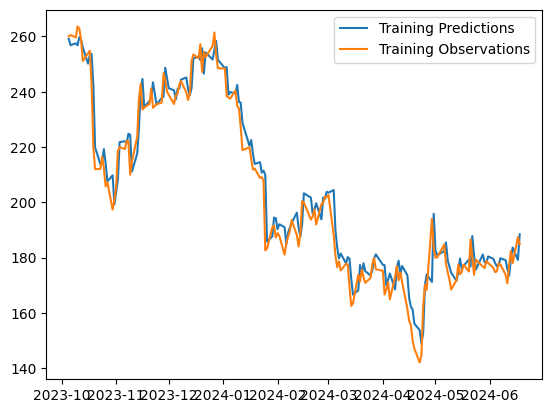

In [13]:
train_predict = model.predict(x_train).flatten()

plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

save_path = 'outputs/' + truncated_name + "training.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


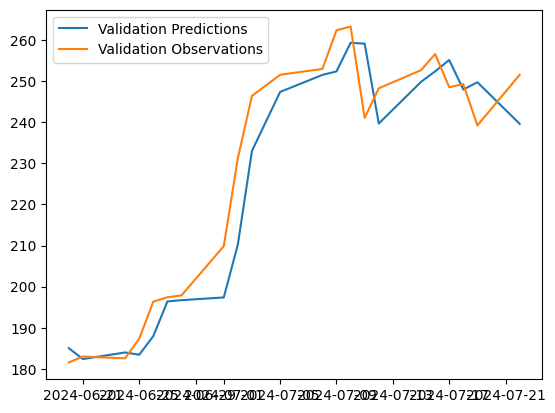

In [14]:
val_predict = model.predict(x_val).flatten()

plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

save_path = 'outputs/' + truncated_name + "validation.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


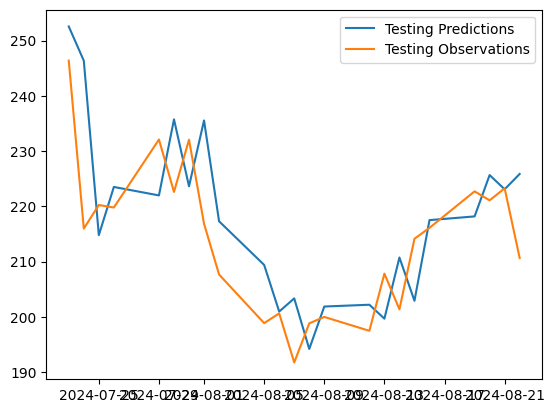

In [15]:
test_predict = model.predict(x_test).flatten()

plt.plot(dates_test, test_predict)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

save_path = 'outputs/' + truncated_name + "testing.png"
plt.savefig(save_path)

In [16]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.
